# Protein Analysis Notebook

This notebook performs protein property analysis of MutS, butyrylCoA and ptsP genes. The analyses include:

 - Molecular weight
 - Aromaticity
 - Instability index
 - Isoelectric point
 - Amino acid composition
 - Predicted secondary structure

 The genes are read directly from the project's 'genes' folder, which contains the FASTA files for each gene sequence.

In [9]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from matplotlib.gridspec import GridSpec

In [10]:
def set_style():
    """Set the style for all plots"""
    plt.style.use('seaborn-v0_8')  # Using a valid seaborn style name
    sns.set_palette("husl")

In [11]:
def plot_protein_properties(analysis_results):
    """Create comprehensive protein property visualizations"""
    # Create figure with polar projection
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Define properties and their typical ranges
    properties = {
        'Molecular Weight': {'value': analysis_results['Molecular Weight'], 
                           'range': [5000, 500000]},
        'Aromaticity': {'value': analysis_results['Aromaticity'], 
                       'range': [0, 1]},
        'Instability Index': {'value': analysis_results['Instability Index'], 
                            'range': [0, 100]},
        'Isoelectric Point': {'value': analysis_results['Isoelectric Point'], 
                            'range': [0, 14]}
    }
    
    # Calculate normalized values (0-1 scale)
    normalized_values = []
    labels = []
    actual_values = []
    
    for prop, data in properties.items():
        min_val, max_val = data['range']
        norm_val = (data['value'] - min_val) / (max_val - min_val)
        norm_val = max(0, min(1, norm_val))  # Clamp between 0 and 1
        normalized_values.append(norm_val)
        labels.append(prop)
        actual_values.append(data['value'])
    
    # Complete the circular plot by appending first value
    normalized_values.append(normalized_values[0])
    
    # Set up angles for the radar chart
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
    
    # Plot the radar chart
    ax.plot(angles, normalized_values, 'o-', linewidth=2, color='#2E86C1')
    ax.fill(angles, normalized_values, alpha=0.25, color='#2E86C1')
    
    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Add value annotations
    for angle, value, norm_val in zip(angles[:-1], actual_values, normalized_values[:-1]):
        ha = 'left' if -np.pi/2 <= angle <= np.pi/2 else 'right'
        ax.annotate(f'{value:.2f}', 
                   xy=(angle, norm_val),
                   xytext=(angle, norm_val + 0.1),
                   ha=ha,
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    # Customize the grid
    ax.set_ylim(0, 1.5)  # Give space for annotations
    ax.grid(True, alpha=0.3)
    
    plt.title('Protein Properties Overview', size=14, pad=20)
    plt.tight_layout()
    plt.show()

In [12]:
def plot_amino_acid_composition(aa_composition):
    """Create a bar chart of amino acid composition"""
    plt.figure(figsize=(15, 6))
    
    sns.barplot(x=list(aa_composition.keys()), 
                y=list(aa_composition.values()),
                hue=list(aa_composition.keys()),
                legend=False,
                palette="husl")
    
    plt.title('Amino Acid Composition', size=14, pad=20)
    plt.xlabel('Amino Acid')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
def plot_secondary_structure(sec_struct):
    """Create a pie chart of secondary structure composition"""
    plt.figure(figsize=(10, 8))
    
    # Convert tuple to list for plotting
    sec_struct_list = list(sec_struct)
    labels = ['Helix', 'Turn', 'Sheet']
    
    plt.pie(sec_struct_list, labels=labels, autopct='%1.1f%%',
            colors=sns.color_palette("husl", 3),
            explode=[0.05]*3)
    
    plt.title('Predicted Secondary Structure Composition', size=14, pad=20)
    plt.show()

In [14]:
def analyze_protein(protein_sequence):
    """Analyzes protein properties using ProteinAnalysis class from Biopython."""
    try:
        protein_analysis = ProteinAnalysis(str(protein_sequence))

        analysis_results = {
            "Molecular Weight": float(protein_analysis.molecular_weight()),
            "Aromaticity": float(protein_analysis.aromaticity()),
            "Instability Index": float(protein_analysis.instability_index()),
            "Isoelectric Point": float(protein_analysis.isoelectric_point()),
            "Secondary Structure Fraction": [float(x) for x in protein_analysis.secondary_structure_fraction()],
            "Amino Acid Composition": protein_analysis.get_amino_acids_percent()
        }

        # Create protein-related visualizations
        plot_protein_properties(analysis_results)
        plot_amino_acid_composition(analysis_results["Amino Acid Composition"])
        plot_secondary_structure(analysis_results["Secondary Structure Fraction"])

        return analysis_results
        
    except Exception as e:
        print(f"Error analyzing protein: {str(e)}")
        return None

In [15]:
def read_genes_from_folder(folder_path='genes'):
    """Read all FASTA files from the specified folder"""
    genes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.fasta'):
            file_path = os.path.join(folder_path, filename)
            gene_name = filename.split('.')[0]
            for record in SeqIO.parse(file_path, 'fasta'):
                genes[gene_name] = str(record.seq)
                break  # Only take the first sequence from each file
    return genes

## Protein Analysis of Genes
This section performs comprehensive protein analysis on each gene sequence, generating visualizations and calculating key properties that help characterize these proteins and their potential functions."


Analyzing butyrylCoA:
--------------------------------------------------


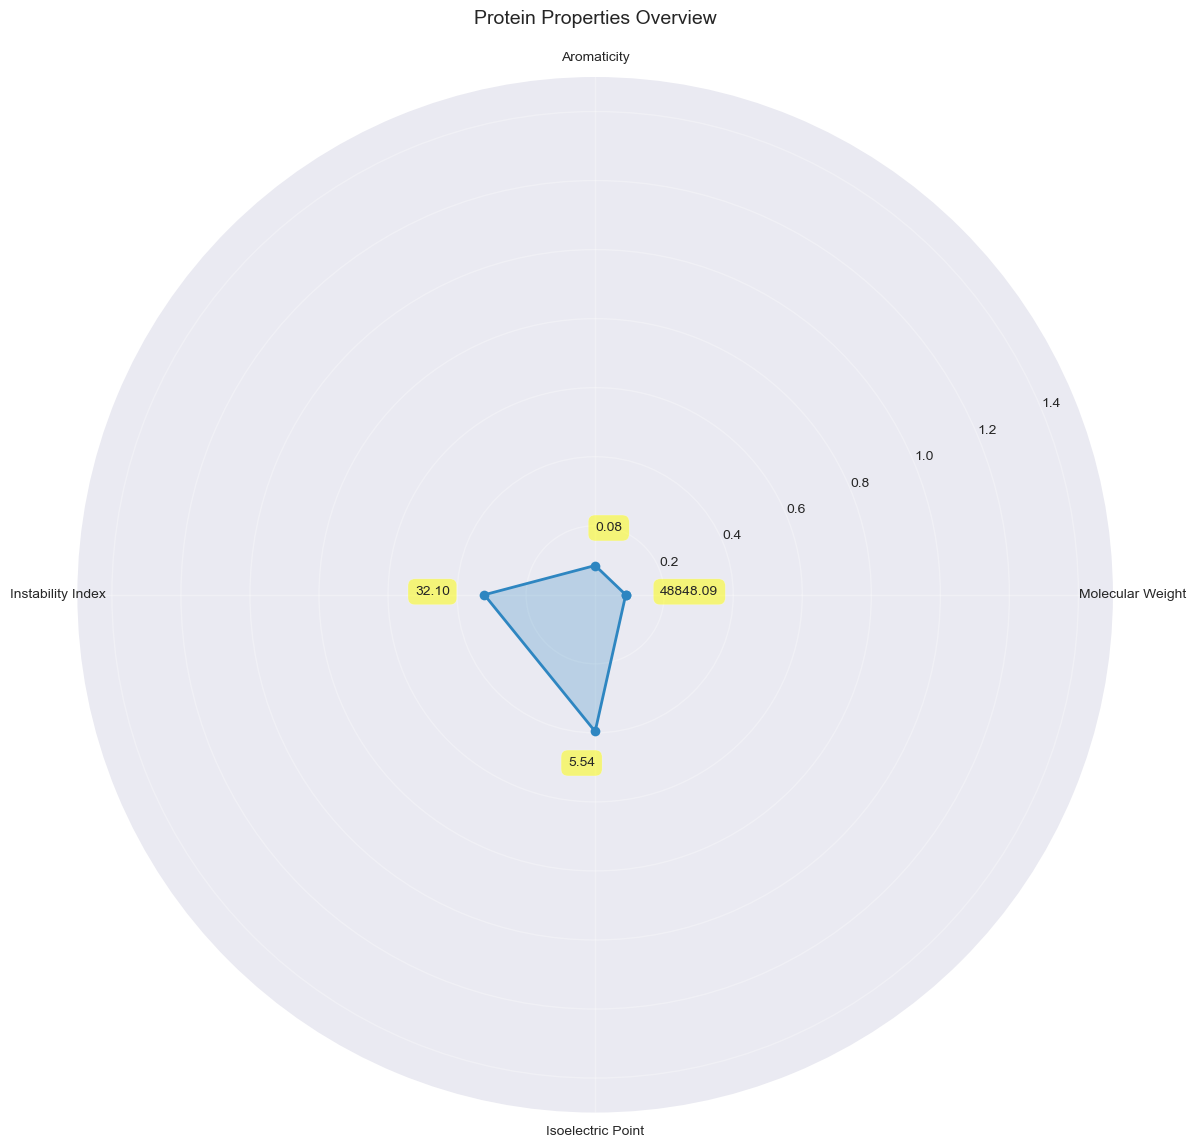

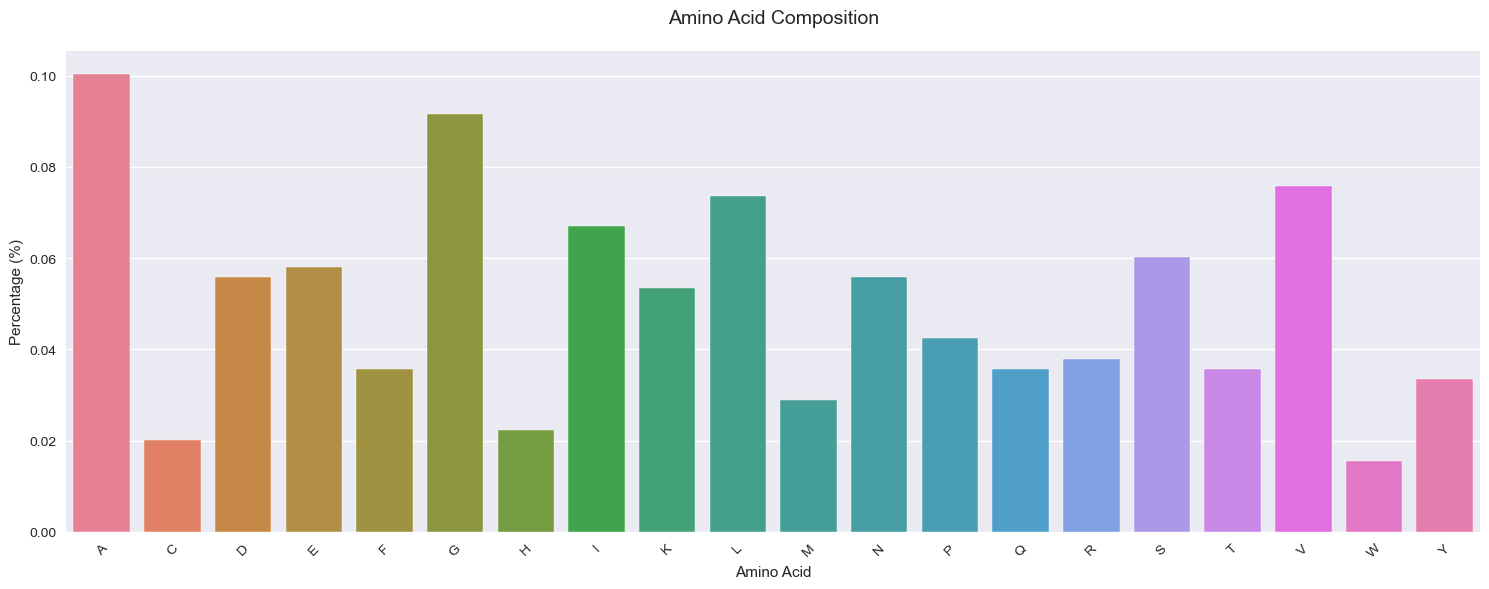

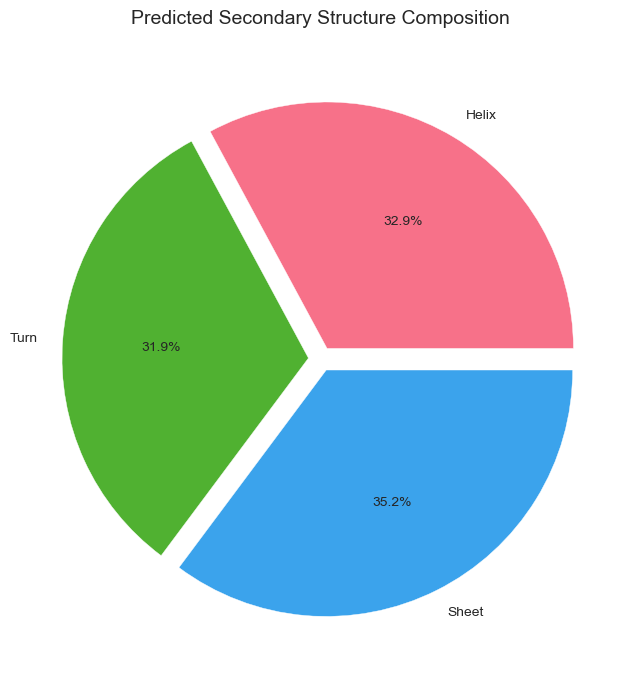


Numerical Results:
Molecular Weight: 48848.09
Aromaticity: 0.08
Instability Index: 32.10
Isoelectric Point: 5.54
--------------------------------------------------

Analyzing MutS:
--------------------------------------------------


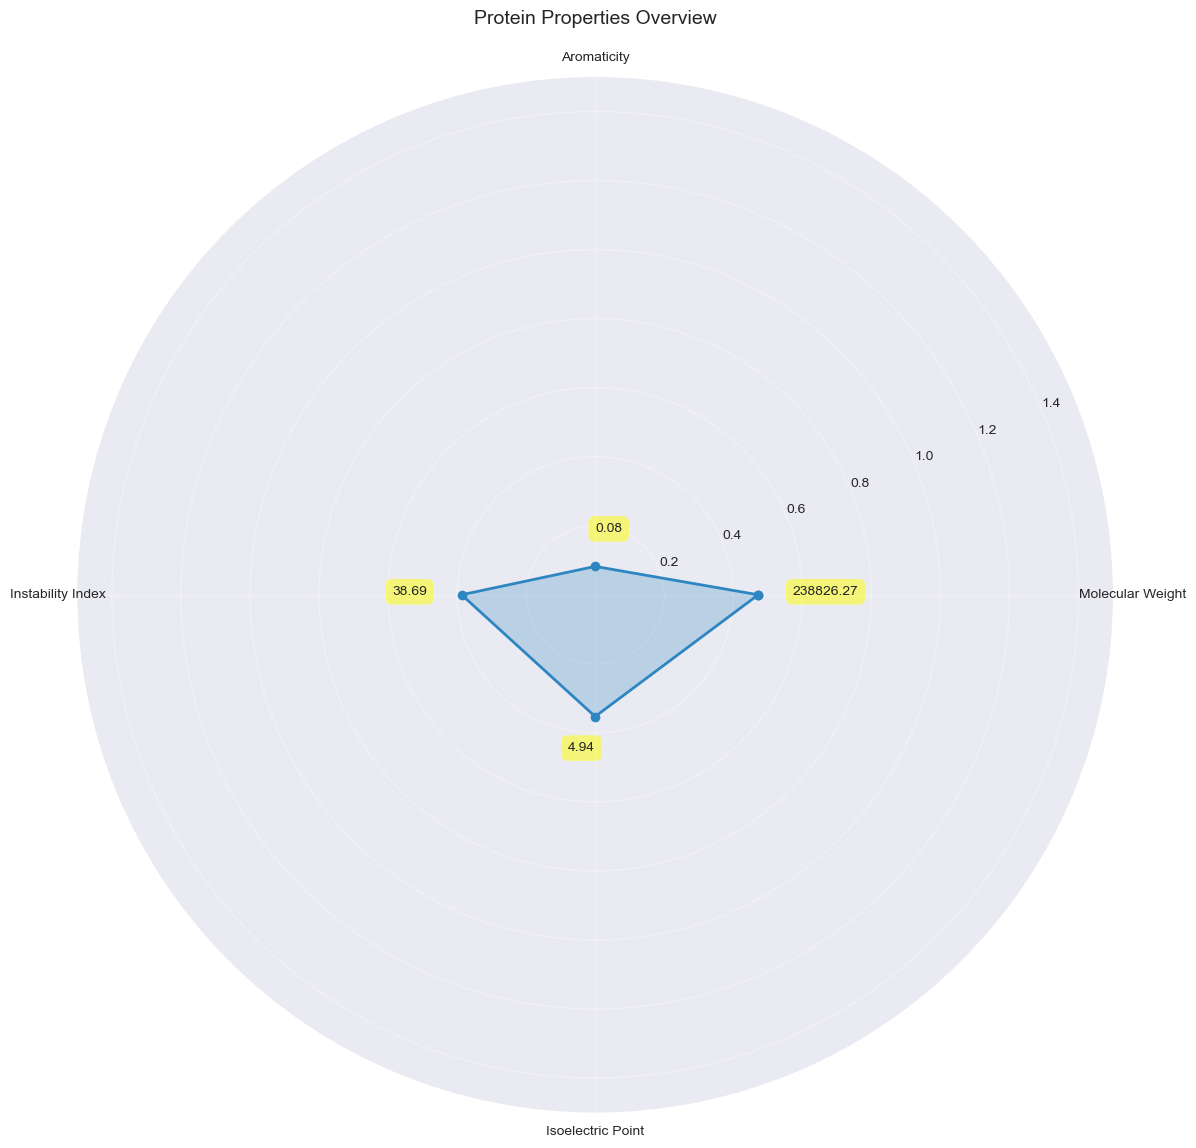

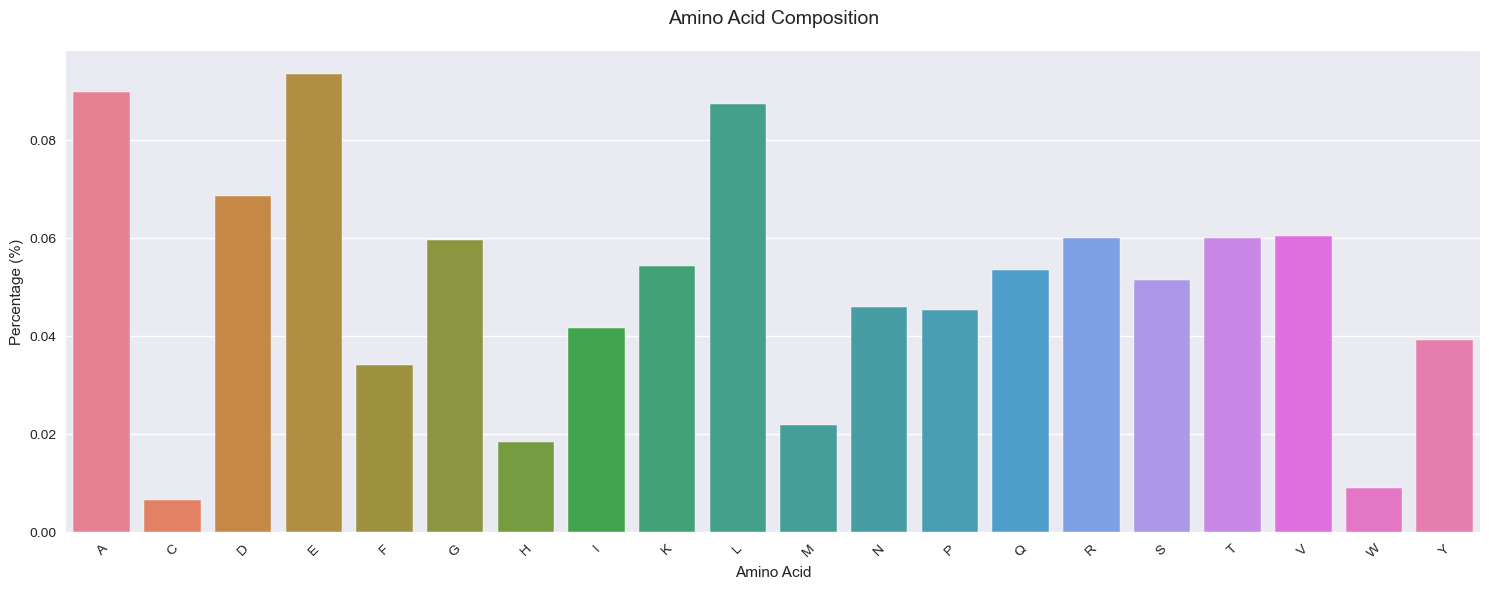

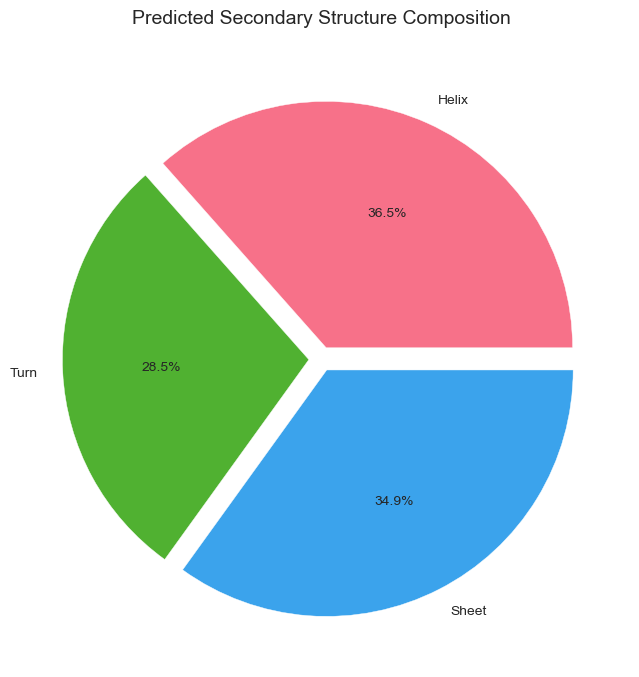


Numerical Results:
Molecular Weight: 238826.27
Aromaticity: 0.08
Instability Index: 38.69
Isoelectric Point: 4.94
--------------------------------------------------

Analyzing ptsP:
--------------------------------------------------


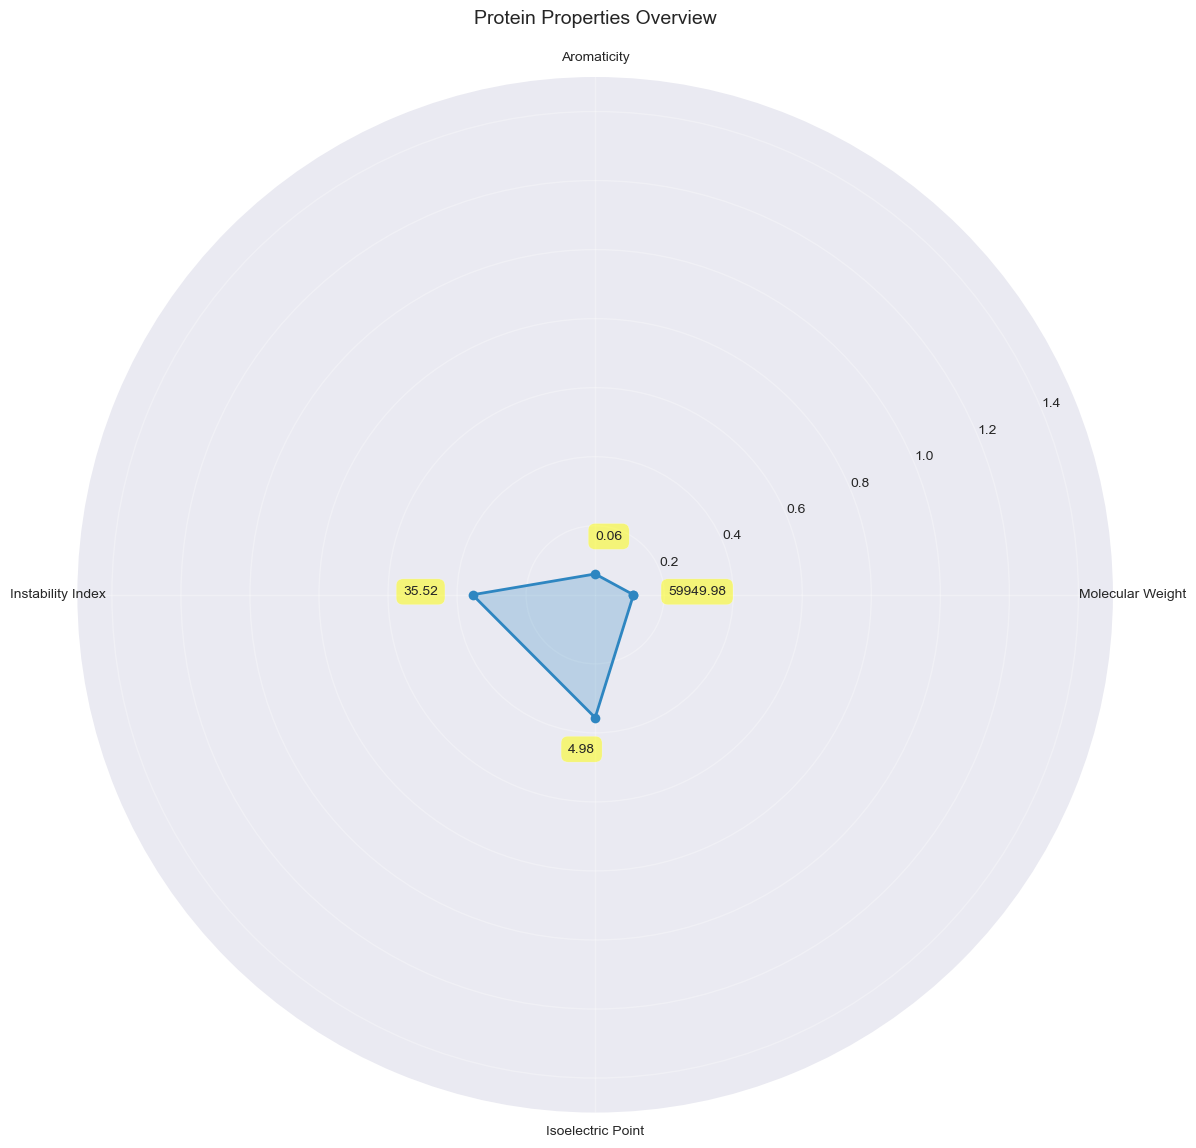

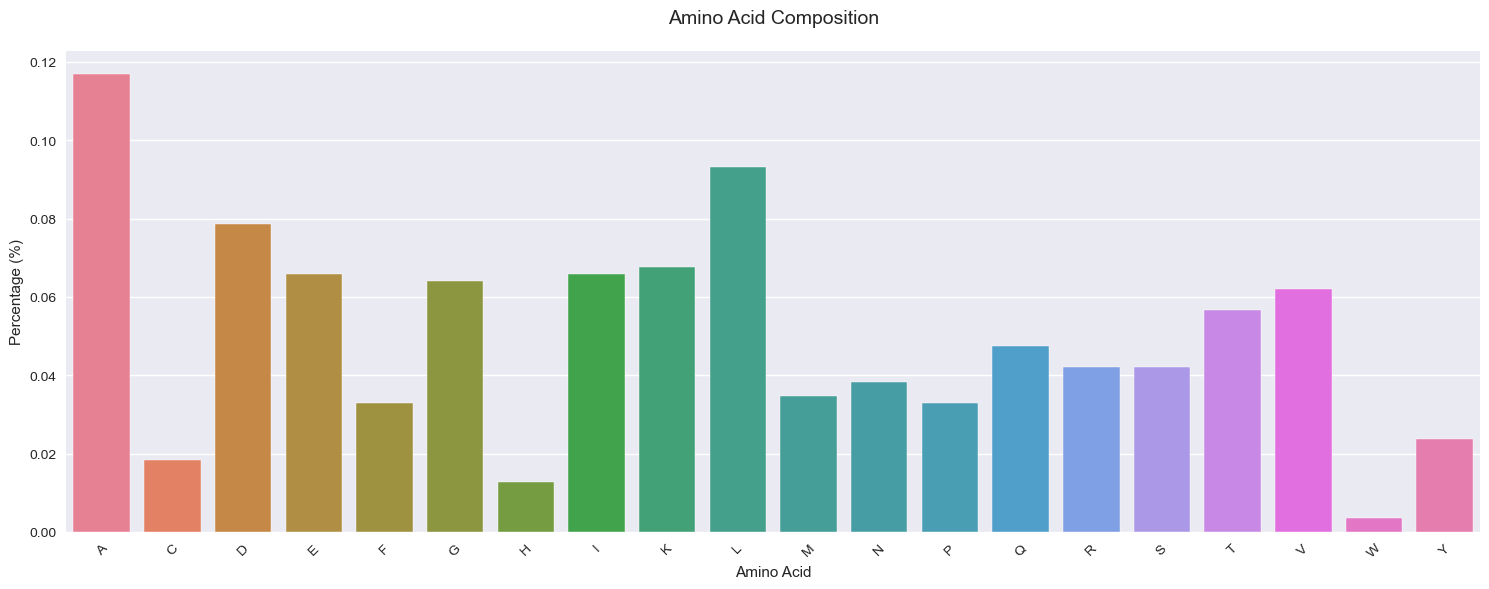

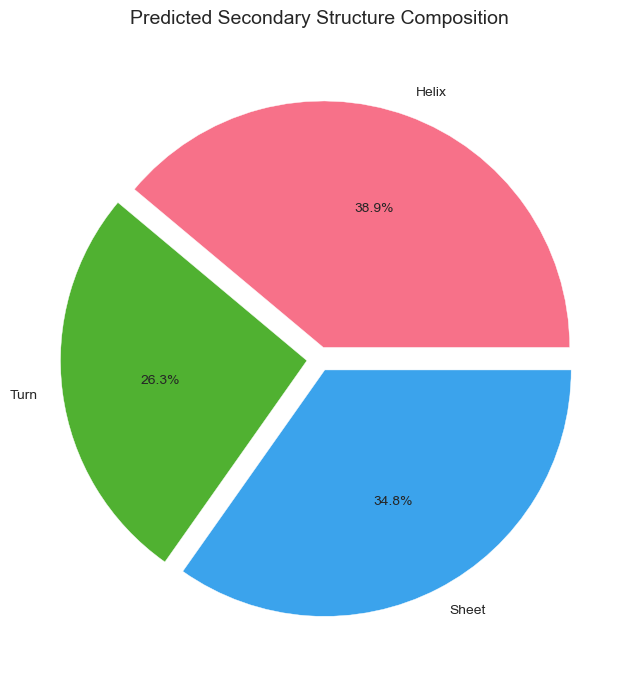


Numerical Results:
Molecular Weight: 59949.98
Aromaticity: 0.06
Instability Index: 35.52
Isoelectric Point: 4.98
--------------------------------------------------


In [16]:
# Set the plotting style
set_style()

# Read all genes from the genes folder
genes = read_genes_from_folder()

# Analyze each gene
for gene_name, sequence in genes.items():
    print(f"\nAnalyzing {gene_name}:")
    print("-" * 50)
    
    results = analyze_protein(sequence)
    
    if results:
        print("\nNumerical Results:")
        for key, value in results.items():
            if key != "Amino Acid Composition" and key != "Secondary Structure Fraction":
                print(f"{key}: {value:.2f}")
    print("-" * 50)